In [1]:
import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time


# Interpolação - Lagrange


## Forma de Lagrange 
![](forma_de_lagrange.png)


## Polinômio de Lagrange 

![](polinomio_de_lagrange.png)

In [3]:

def lagrange_interp(xi, yi, x):
    n = np.size(xi); 
    m = np.size(x); 
    
    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:] * (x - xi[j])) / (xi[i] - xi[j]);

    y = yi.dot(L);
    return y;




In [4]:
xi = np.array([-2,0,3,5], dtype='double');
print(xi);
yi = np.array([3,-2,4,2], dtype='double');
print(yi);
x = np.linspace(-2, 5, num=41, endpoint=True)

y = lagrange_interp(xi,yi,x)



[-2.  0.  3.  5.]
[ 3. -2.  4.  2.]


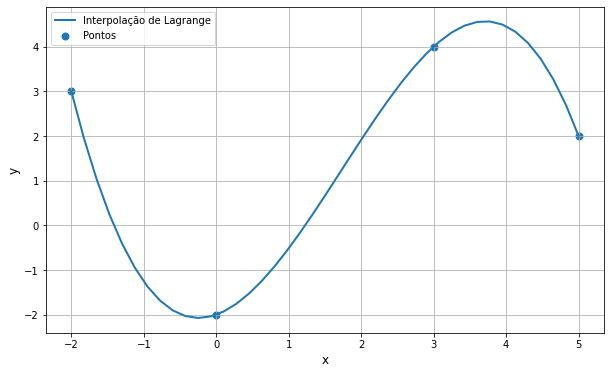

In [19]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.grid()
plt.show()

# Interpolação - Newton


## Forma de Newton

![](forma_de_newton.png)


## Coeficiente alpha 

![](coeficiente_alpha.png)


## Diferença Dividida

![](diferenca_divida_k.png)


In [6]:
def newton_interp(xi,yi,x):
    n = np.size(xi); ni = np.size(x); N = np.ones((n,ni));
    D = np.zeros((n,n)); D[:,0] = yi;
    
    for j in np.arange(n - 1):
        for i in np.arange(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xi[i + j + 1]- xi[i]);

    for i in np.arange(1, n):
        N[i,:] = N[i-1,:] * (x - xi[i - 1]);
    
    y = D[0,:].dot(N)
    
    return y


In [7]:

xi = np.array([-2,0,3,5], dtype='double');
print(xi);
yi = np.array([3,-2,4,2], dtype='double');
print(yi);
x = np.linspace(-2, 5, num=41, endpoint=True)

y = newton_interp(xi,yi,x)


[-2.  0.  3.  5.]
[ 3. -2.  4.  2.]


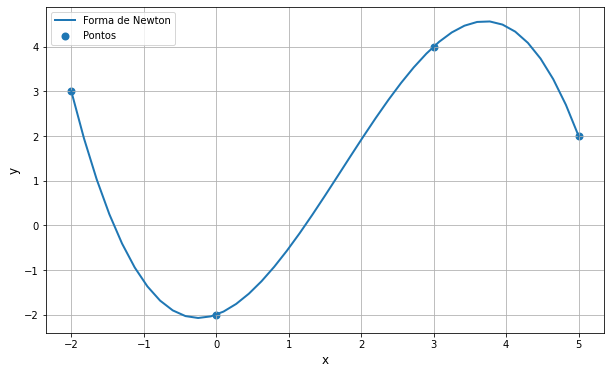

In [18]:

plt.figure(figsize=(10,6),facecolor='white')
plt.grid()
plt.plot(x,y,label = 'Forma de Newton',linewidth = 2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.show()